In [1]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git

Cloning into 'Facial-Expression-Dataset'...
Updating files:   2% (1044/35887)
Updating files:   3% (1077/35887)
Updating files:   4% (1436/35887)
Updating files:   5% (1795/35887)
Updating files:   5% (1983/35887)
Updating files:   6% (2154/35887)
Updating files:   7% (2513/35887)
Updating files:   8% (2871/35887)
Updating files:   8% (2899/35887)
Updating files:   9% (3230/35887)
Updating files:  10% (3589/35887)
Updating files:  10% (3838/35887)
Updating files:  11% (3948/35887)
Updating files:  12% (4307/35887)
Updating files:  13% (4666/35887)
Updating files:  13% (4673/35887)
Updating files:  14% (5025/35887)
Updating files:  15% (5384/35887)
Updating files:  15% (5627/35887)
Updating files:  16% (5742/35887)
Updating files:  17% (6101/35887)
Updating files:  17% (6429/35887)
Updating files:  18% (6460/35887)
Updating files:  19% (6819/35887)
Updating files:  20% (7178/35887)
Updating files:  20% (7260/35887)
Updating files:  21% (7537/35887)
Updating files:  22% (7896/35887)
Upda

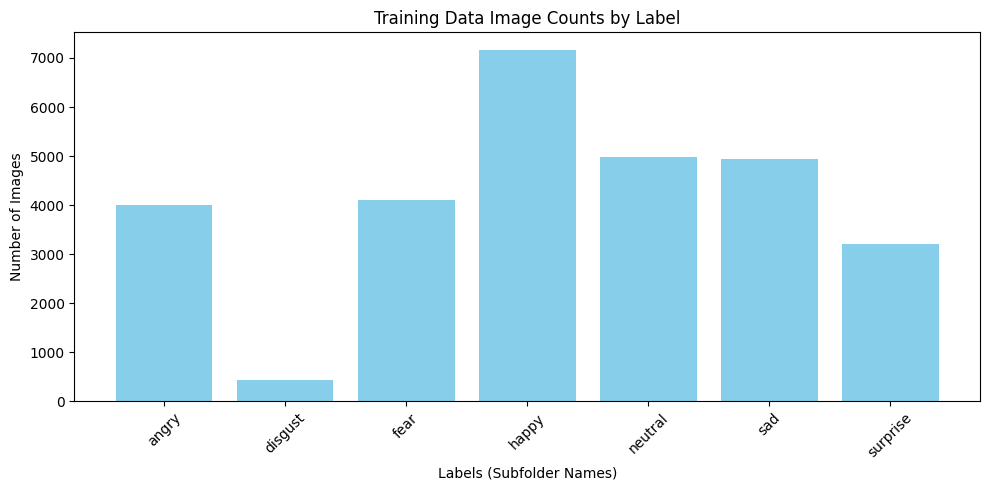

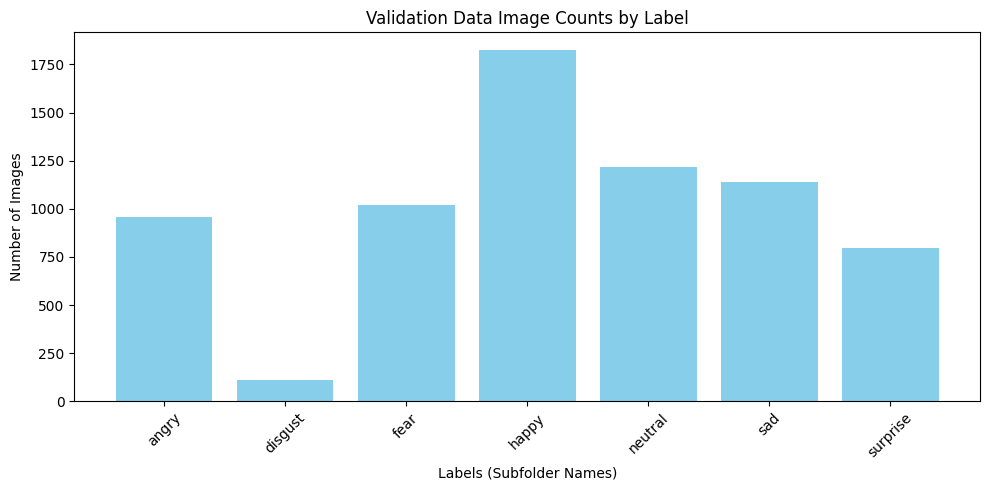

In [3]:
import os
import matplotlib.pyplot as plt

def count_images_in_folders(base_path):
    counts = {}
    
    for subdir, _, files in os.walk(base_path):
        # Get the folder name (subfolder)
        folder_name = os.path.basename(subdir)
        # Count image files (assuming common image extensions)
        image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))
        
        if image_count > 0:
            counts[folder_name] = image_count
    
    return counts

def plot_counts(counts, title):
    labels = list(counts.keys())
    values = list(counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Labels (Subfolder Names)')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Paths to the directories
train_path = r'C:\Users\my_vm_demo\Desktop\Github project\ai-bias-detection-tools\Facial-Expression-Dataset\train'
validation_path = r'C:\Users\my_vm_demo\Desktop\Github project\ai-bias-detection-tools\Facial-Expression-Dataset\validation'

# Count images in train and validation folders
train_counts = count_images_in_folders(train_path)
validation_counts = count_images_in_folders(validation_path)

# Plotting the counts
plot_counts(train_counts, 'Training Data Image Counts by Label')
plot_counts(validation_counts, 'Validation Data Image Counts by Label')


C:\Users\my_vm_demo\AppData\Local\Temp\ipykernel_3764\282375604.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45)


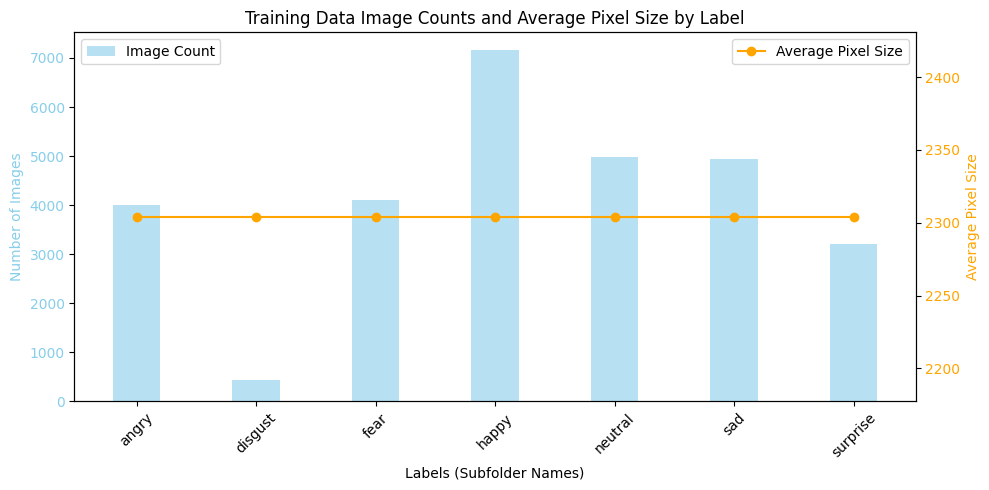

C:\Users\my_vm_demo\AppData\Local\Temp\ipykernel_3764\282375604.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45)


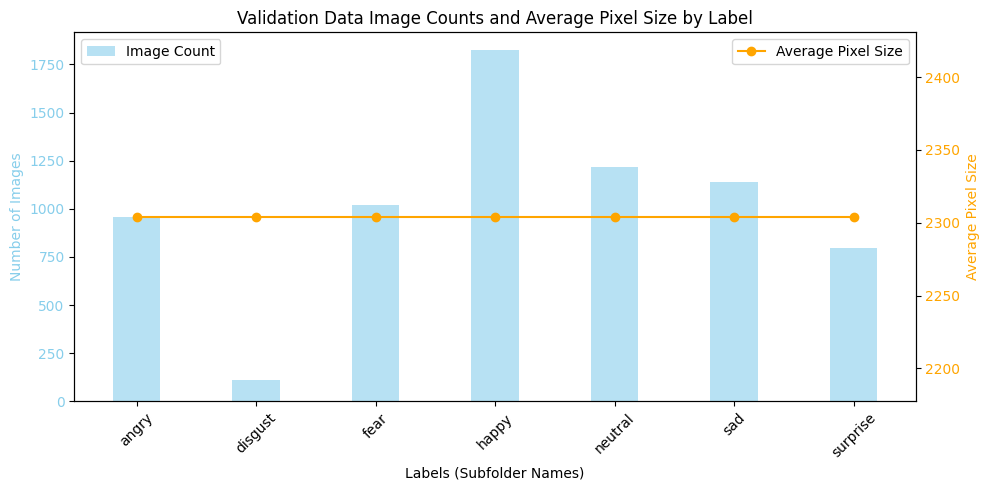

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def count_images_and_average_size(base_path):
    counts = {}
    average_sizes = {}
    
    for subdir, _, files in os.walk(base_path):
        # Get the folder name (subfolder)
        folder_name = os.path.basename(subdir)
        image_count = 0
        total_size = 0
        
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                # Open the image to get its size
                img_path = os.path.join(subdir, file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    total_size += width * height  # Total pixel count
                    image_count += 1
        
        if image_count > 0:
            counts[folder_name] = image_count
            average_sizes[folder_name] = total_size / image_count  # Average pixel size
            
    return counts, average_sizes

def plot_counts_and_average_size(counts, average_sizes, title):
    labels = list(counts.keys())
    values = list(counts.values())
    avg_sizes = list(average_sizes.values())
    
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax2 = ax1.twinx()
    ax1.bar(labels, values, color='skyblue', alpha=0.6, width=0.4, label='Image Count')
    ax2.plot(labels, avg_sizes, color='orange', marker='o', label='Average Pixel Size')

    ax1.set_xlabel('Labels (Subfolder Names)')
    ax1.set_ylabel('Number of Images', color='skyblue')
    ax2.set_ylabel('Average Pixel Size', color='orange')

    ax1.set_title(title)
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax1.set_xticklabels(labels, rotation=45)
    fig.tight_layout()
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()

# Paths to the directories
train_path = r'C:\Users\my_vm_demo\Desktop\Github project\ai-bias-detection-tools\Facial-Expression-Dataset\train'
validation_path = r'C:\Users\my_vm_demo\Desktop\Github project\ai-bias-detection-tools\Facial-Expression-Dataset\validation'

# Count images and calculate average pixel sizes in train and validation folders
train_counts, train_avg_sizes = count_images_and_average_size(train_path)
validation_counts, validation_avg_sizes = count_images_and_average_size(validation_path)

# Plotting the counts and average pixel sizes
plot_counts_and_average_size(train_counts, train_avg_sizes, 'Training Data Image Counts and Average Pixel Size by Label')
plot_counts_and_average_size(validation_counts, validation_avg_sizes, 'Validation Data Image Counts and Average Pixel Size by Label')
